<a href="https://colab.research.google.com/github/mohamed7456/ML-Course-Assignments/blob/main/notebooks/06_naive_bayes_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **1. Data Exploration and Preprocessing**

In [ ]:
df = pd.read_csv("/content/titanic_dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


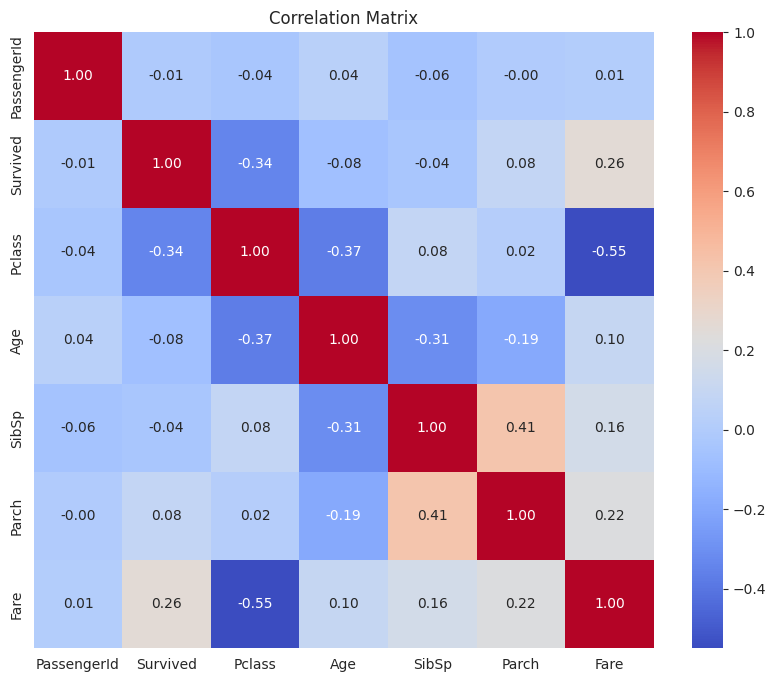

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

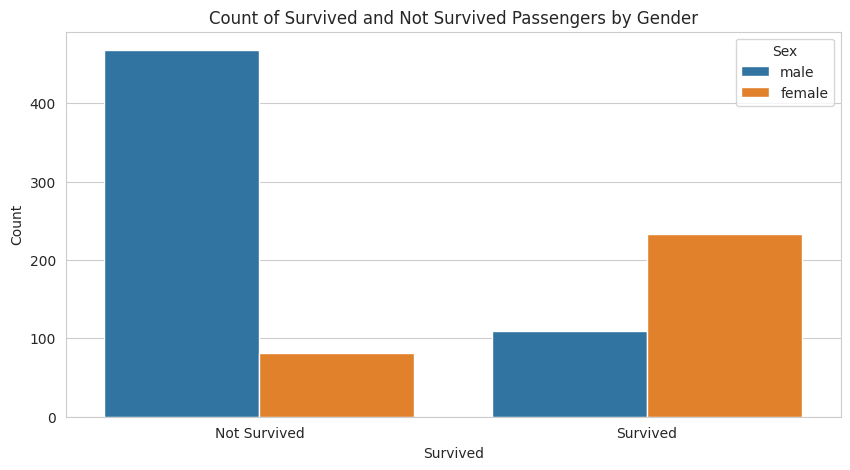

In [ ]:
# Set the style of the seaborn plots
sns.set_style("whitegrid")

# Plot count of survived and not survived passengers considering gender
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Survived', hue='Sex')
plt.title('Count of Survived and Not Survived Passengers by Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'])
plt.legend(title='Sex')
plt.show()

In [ ]:
# Name, Passenger ID and Ticker are irrelevant to the target so drop them
df.drop(['PassengerId', 'Name', 'Ticket'], inplace=True, axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [ ]:
# NULLs
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
# Fill missing age values with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

In [ ]:
print('Percent of missing Cabin records is %.2f%%' %((df['Cabin'].isnull().sum()/df.shape[0])*100))

Percent of missing Cabin records is 77.10%


In [ ]:
# too many nulls in Cabin column, if imputed it won't be accurate
df.drop('Cabin', axis=1, inplace=True) # so drop coloumn

In [ ]:
df.dropna(subset = ['Embarked'], inplace=True)  # Remove rows with missing 'Embarked' values they are only 2

In [ ]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['Pclass',"Embarked", "Sex"],dtype=int)
df.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,1,0
3,1,35.0,1,0,53.1000,1,0,0,0,0,1,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,1


# **2. Feature Selection**

In [ ]:
selected_features = ['Survived', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Sex_female', 'Embarked_Q', 'Embarked_S']
df = df[selected_features]

In [ ]:
from sklearn.model_selection import train_test_split
# Splitting the data
X = df.drop(['Survived'], axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# **3. Model Implementation and Evaluation**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

In [ ]:
# Intializing and training the model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Evaluate the model
y_pred = naive_bayes_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

In [ ]:
# Cross-validation
cv_accuracy = cross_val_score(naive_bayes_model, X_train, y_train, cv=5, scoring='accuracy').mean()

In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cross-Validation Accuracy:", cv_accuracy)

Accuracy: 0.8102893890675241
Precision: 0.7568807339449541
Recall: 0.717391304347826
F1 Score: 0.7366071428571429
Cross-Validation Accuracy: 0.8021935483870968


# **4- Prediction**

In [ ]:
y_pred_test = naive_bayes_model.predict(X_test)

In [ ]:
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print("Model prediction accuracy on test set:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_test)

Model prediction accuracy on test set:
Accuracy: 0.7640449438202247
Precision: 0.7117117117117117
Recall: 0.7181818181818181
F1-score: 0.7149321266968325


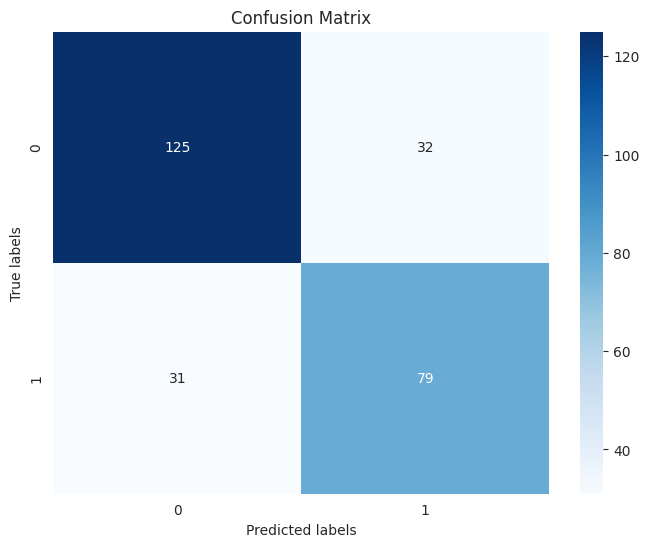

In [ ]:
from sklearn.metrics import confusion_matrix
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()